In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score

# Load the dataset
# The dataset is in a CSV file with semicolon separation

data = pd.read_csv('/content/Absenteeism_at_work.csv', delimiter=';')
print(data.shape) # Find the rows and columns of the dataset
data.head(740)  # Preview the rows of the dataset

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df = pd.DataFrame(data)
value_counts = df['Reason for absence'].value_counts()
print(value_counts)

Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64


The above shows the reason for absenteeism. The top 11 reasons for higher no. of absenteeism (in the order of occurrence):
1. Medical consultation
2. Dental consultation
3. Physiotherapy
4. Diseases of the musculoskeletal system and connective tissue
5. No reason attributed
6. Injury, poisoning and certain other consequences of external causes  
7. patient follow-up
8. unjustified absence
9. laboratory examination
10. Diseases of the digestive system
11. Diseases of the respiratory system  

In [5]:
# Drop unnecessary columns
data.drop(columns=['ID'], inplace=True)

In [6]:
# Create target variable: Absent (1) or Not Absent (0)
data['target'] = (data['Absenteeism time in hours'] > 0).astype(int)

In [7]:
# Features for prediction
X = data.drop(columns=['target', 'Absenteeism time in hours'])
y = data['target']

In [8]:
data.head(740)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,target
0,26,7,3,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,4,1
1,0,7,3,1,118,13,18,50,239.554,97,...,1,1,1,0,0,98,178,31,0,0
2,23,7,4,1,179,51,18,38,239.554,97,...,1,0,1,0,0,89,170,31,2,1
3,7,7,5,1,279,5,14,39,239.554,97,...,1,2,1,1,0,68,168,24,4,1
4,23,7,5,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,...,1,2,1,0,1,90,172,30,8,1
736,11,7,3,1,235,11,14,37,264.604,93,...,3,1,0,0,1,88,172,29,4,1
737,0,0,3,1,118,14,13,40,271.219,95,...,1,1,1,0,8,98,170,34,0,0
738,0,0,4,2,231,35,14,39,271.219,95,...,1,2,1,0,2,100,170,35,0,0


In [9]:
# Select features relevant for clustering (example)
X_cluster = data[['Age', 'Service time', 'Body mass index', 'Absenteeism time in hours']].copy()

# Handle missing values
X_cluster.fillna(X_cluster.mean(), inplace=True)

In [10]:
# Split data into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For clustering, scale the features
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [12]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       138

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


**Overall Performance:**

The model has perfect performance across all classes, as indicated by the precision, recall, and F1-score of 1.00 for both class 0 and class 1.
Accuracy is also 1.00, which means no errors in the classification.
The macro and weighted averages being 1.00 confirms that the model performs equally well on both classes, even though the number of instances of class 1 is much larger.

**Conclusion:**

This classification report indicates perfect classification. The model has achieved 100% precision, recall, and F1-score for both classes, meaning it has correctly predicted every instance in the test set.

In [17]:
from sklearn.metrics import confusion_matrix

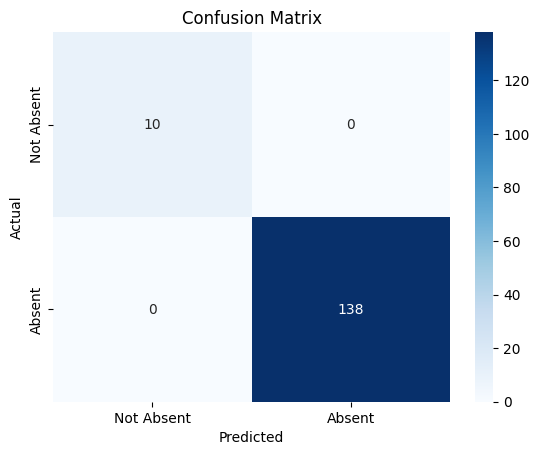

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Absent', 'Absent'], yticklabels=['Not Absent', 'Absent'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


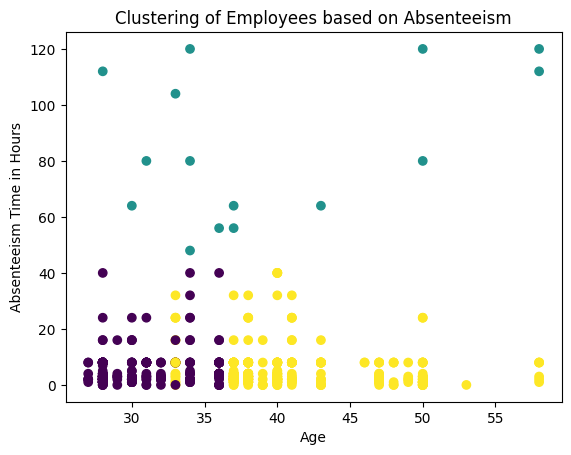

Silhouette Score: 0.3806725521559604


In [20]:
# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize the clusters
plt.scatter(data['Age'], data['Absenteeism time in hours'], c=data['Cluster'])
plt.xlabel('Age')
plt.ylabel('Absenteeism Time in Hours')
plt.title('Clustering of Employees based on Absenteeism')
plt.show()

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

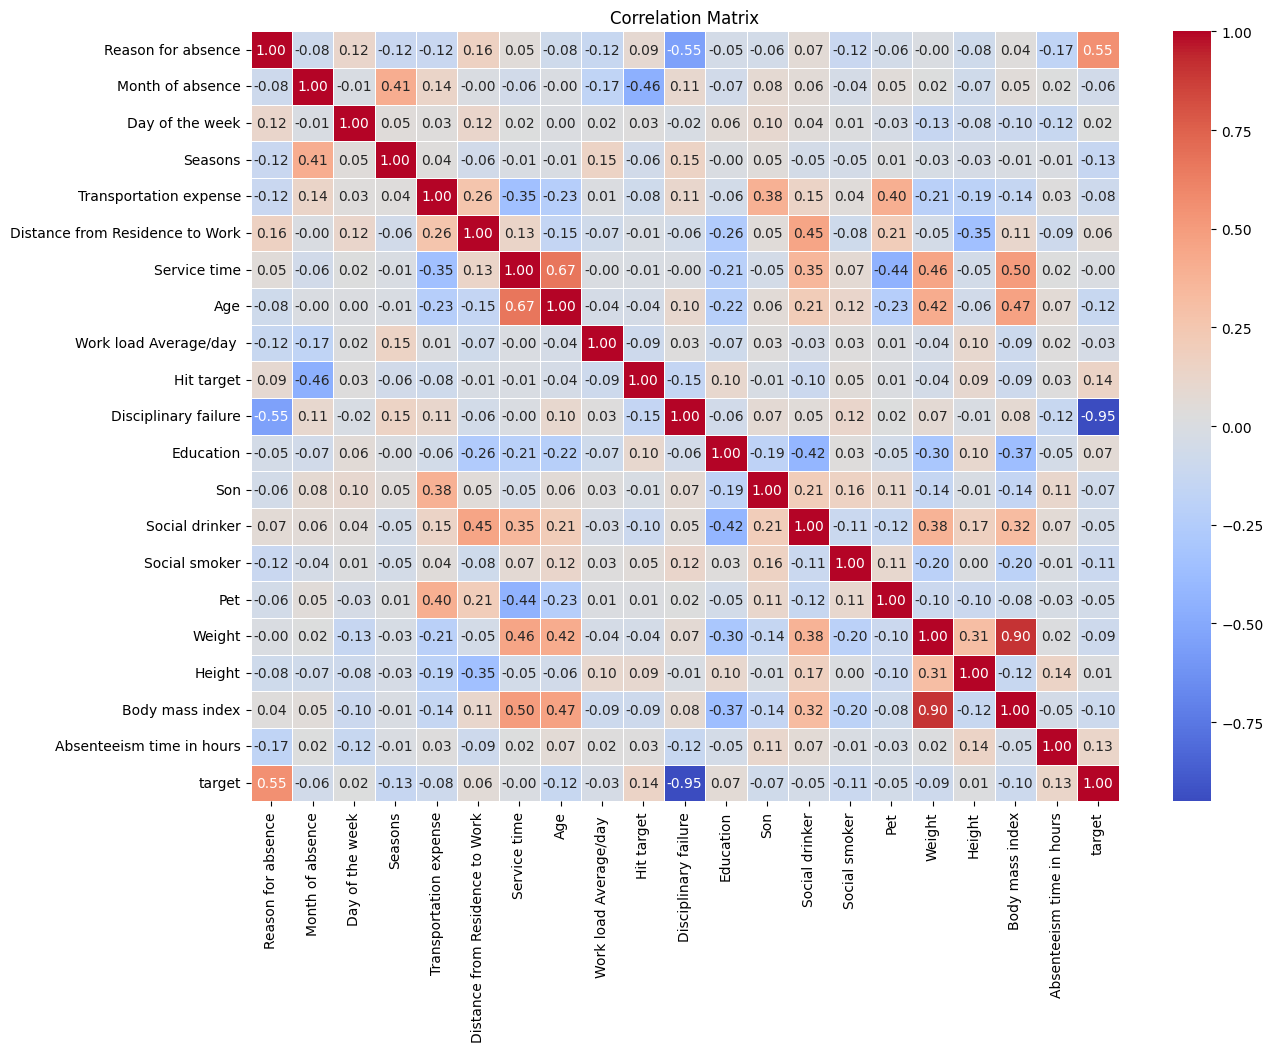

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

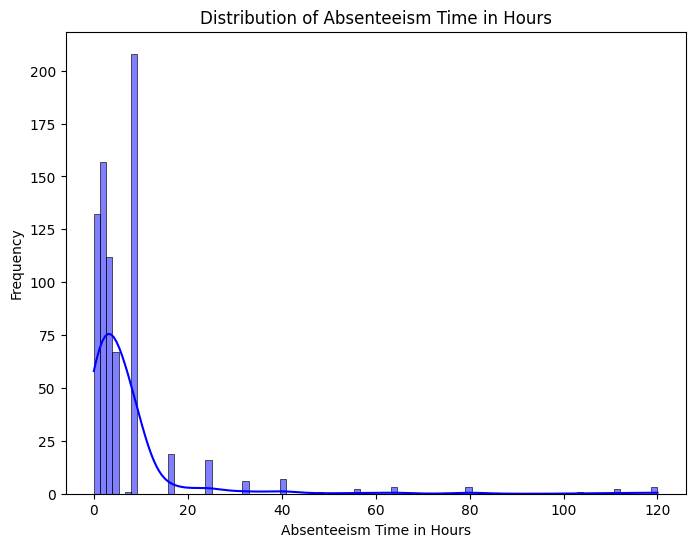

In [21]:
# Plot the distribution of Absenteeism Time in Hours
plt.figure(figsize=(8, 6))
sns.histplot(data['Absenteeism time in hours'], kde=True, color='blue')
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Frequency')
plt.show()

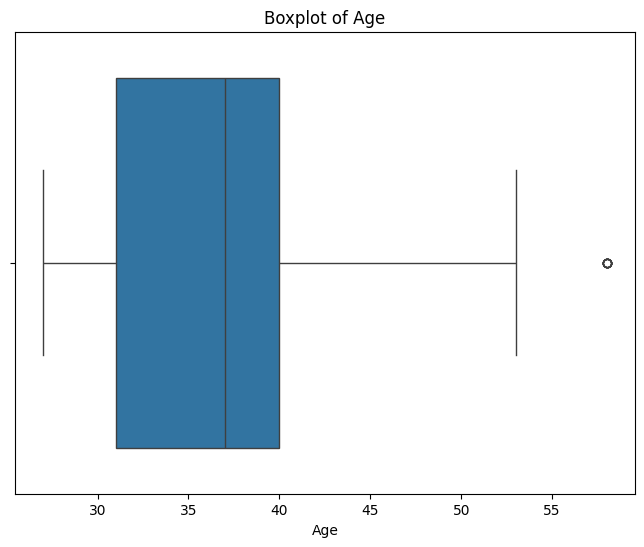

In [ ]:
# Boxplot to identify outliers in 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

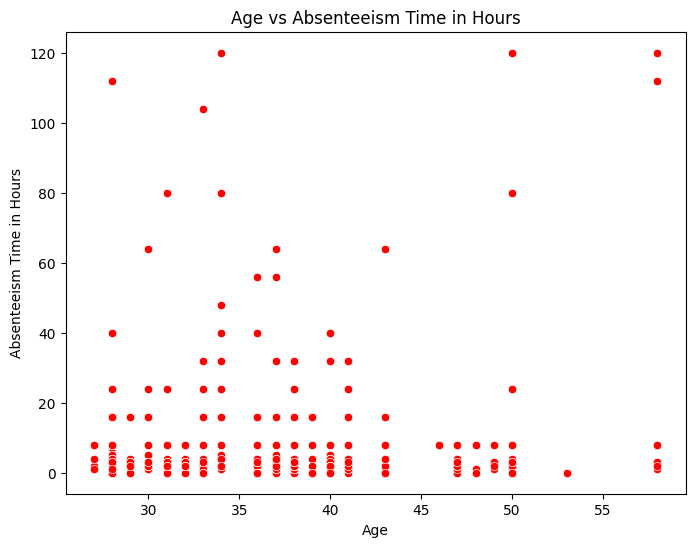

In [22]:
# Plot relationship between Age and Absenteeism time in hours
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['Absenteeism time in hours'], color='red')
plt.title('Age vs Absenteeism Time in Hours')
plt.xlabel('Age')
plt.ylabel('Absenteeism Time in Hours')
plt.show()

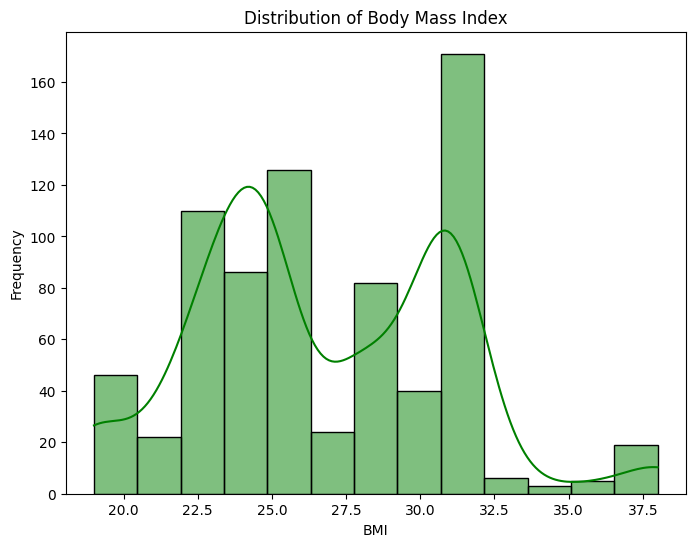

In [23]:
# Check distribution of 'Body mass index' (BMI)
plt.figure(figsize=(8, 6))
sns.histplot(data['Body mass index'], kde=True, color='green')
plt.title('Distribution of Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [24]:
# If we want to calculate the mean absenteeism time for each "Reason for Absence"
mean_absenteeism_by_reason = data.groupby('Reason for absence')['Absenteeism time in hours'].mean()
print("\nMean Absenteeism Time by Reason for Absence:")
print(mean_absenteeism_by_reason)


Mean Absenteeism Time by Reason for Absence:
Reason for absence
0      0.000000
1     11.375000
2     24.000000
3      8.000000
4      4.500000
5      6.333333
6     21.375000
7     10.000000
8      5.333333
9     42.000000
10    11.040000
11    11.423077
12    23.375000
13    15.309091
14     8.789474
15     8.000000
16     2.000000
17     8.000000
18    10.333333
19    18.225000
21     5.833333
22     7.710526
23     2.845638
24     8.000000
25     3.483871
26     7.272727
27     2.275362
28     2.991071
Name: Absenteeism time in hours, dtype: float64


In [26]:
print(f"Number of features used for training: {model.n_features_in_}")

Number of features used for training: 19


In [27]:
print(X_train.columns)

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')


In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
import pandas as pd

# Example new data
new_data = [[26, 7, 4, 1, 179, 51, 13, 33, 239.554, 0, 0, 1, 2, 1, 0, 1, 89, 172, 31]]

# List of feature names used for training (make sure this matches the training data columns)
feature_names = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']

# Create a pandas DataFrame with the new data and correct column names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Scale the new data using the scaler (which was fitted on the training data)
new_data_scaled = scaler.transform(new_data_df)  # Using the DataFrame

# Make the prediction
prediction = model.predict(new_data_scaled)

# Print the prediction result
print("Prediction (1: Absent, 0: Not Absent):", prediction[0])


Prediction (1: Absent, 0: Not Absent): 1
